<a href="https://colab.research.google.com/github/AndyRevilla/datamuestra/blob/main/Ventas_Farmacia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd 
from fbprophet import Prophet 
from fbprophet.plot import add_changepoints_to_plot

In [2]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [35]:
data = pd.read_csv("/content/drive/MyDrive/ventafarmacia.csv",sep=";")
data.head()

,ds,y
0,2022-01-04,681.7
1,2022-01-05,245.5
2,2022-01-06,323.0
3,2022-01-07,96.5
4,2022-01-08,161.5


In [36]:
data.describe()

,y
count,75.000000
mean,202.773333
std,127.600379
min,0.000000
25%,116.750000
50%,204.500000
75%,285.150000
max,681.700000


In [37]:
data.date = pd.to_datetime(data.ds, dayfirst = True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  """Entry point for launching an IPython kernel.


In [38]:
data.head()

,ds,y
0,2022-01-04,681.7
1,2022-01-05,245.5
2,2022-01-06,323.0
3,2022-01-07,96.5
4,2022-01-08,161.5


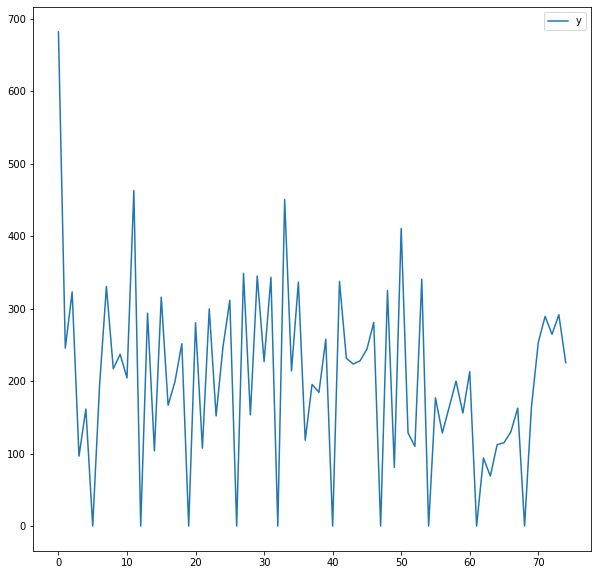

In [39]:
data.plot(figsize=(10,10))

In [40]:
m = Prophet() 
m.fit(data)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [41]:
m = Prophet(interval_width=0.95)
model = m.fit(data)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [52]:
future = m.make_future_dataframe(periods=10,freq='b')
forecast = m.predict(future)
forecast.tail(10)

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
75,2022-03-21,150.949888,12.016057,381.433003,150.949887,150.949888,42.776995,42.776995,42.776995,42.776995,42.776995,42.776995,0.0,0.0,0.0,193.726883
76,2022-03-22,149.673828,2.273701,347.837105,149.673827,149.673829,21.951833,21.951833,21.951833,21.951833,21.951833,21.951833,0.0,0.0,0.0,171.625661
77,2022-03-23,148.397768,24.172197,374.866347,148.397767,148.397769,47.269031,47.269031,47.269031,47.269031,47.269031,47.269031,0.0,0.0,0.0,195.666799
78,2022-03-24,147.121708,-38.530782,320.522276,147.121707,147.121710,2.714100,2.714100,2.714100,2.714100,2.714100,2.714100,0.0,0.0,0.0,149.835809
79,2022-03-25,145.845649,-31.452297,312.875779,145.845647,145.845650,1.200716,1.200716,1.200716,1.200716,1.200716,1.200716,0.0,0.0,0.0,147.046365
80,2022-03-28,142.017469,11.909640,362.476545,142.017466,142.017472,42.776995,42.776995,42.776995,42.776995,42.776995,42.776995,0.0,0.0,0.0,184.794464
81,2022-03-29,140.741409,-20.953019,333.502838,140.741405,140.741413,21.951833,21.951833,21.951833,21.951833,21.951833,21.951833,0.0,0.0,0.0,162.693242
82,2022-03-30,139.465349,-0.213116,356.019810,139.465345,139.465354,47.269031,47.269031,47.269031,47.269031,47.269031,47.269031,0.0,0.0,0.0,186.734380
83,2022-03-31,138.189290,-43.945108,301.759708,138.189284,138.189294,2.714100,2.714100,2.714100,2.714100,2.714100,2.714100,0.0,0.0,0.0,140.903390
84,2022-04-01,136.913230,-37.216319,327.270676,136.913224,136.913235,1.200716,1.200716,1.200716,1.200716,1.200716,1.200716,0.0,0.0,0.0,138.113946


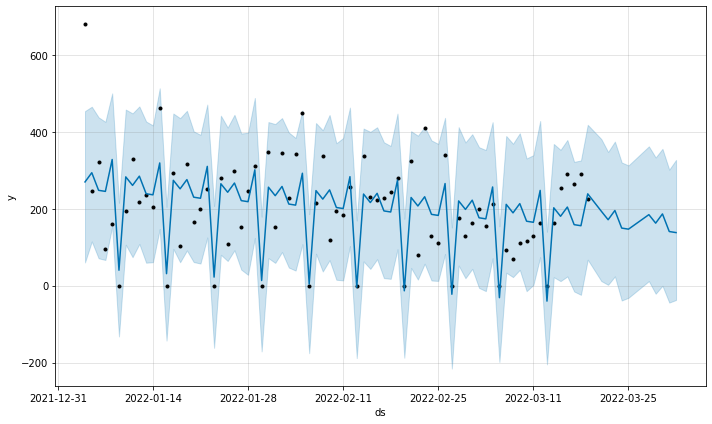

In [55]:
plot1 = m.plot(forecast)

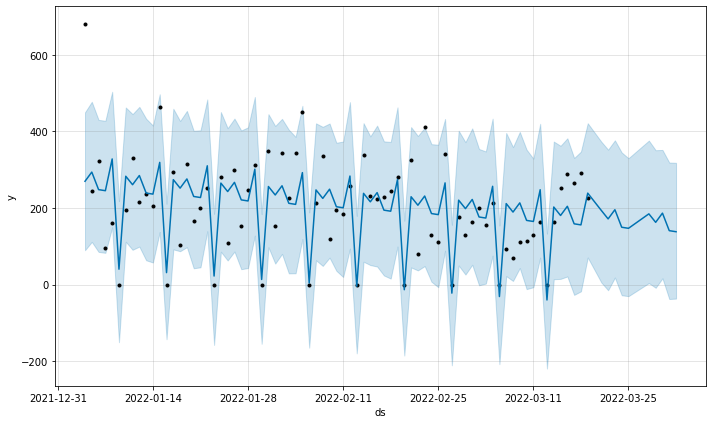

In [56]:
future2 = future.copy()
fcst = m.predict(future2)
fig = m.plot(fcst)

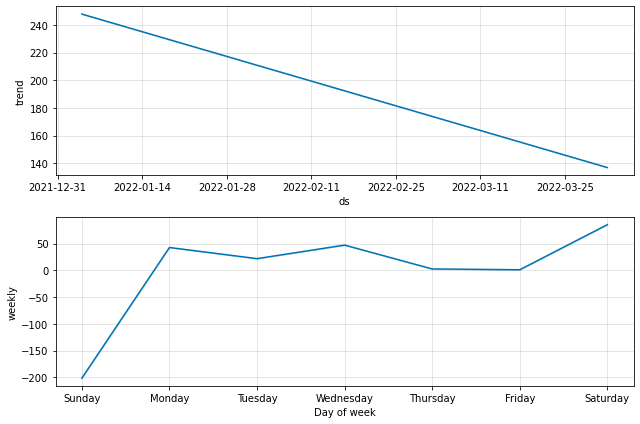

In [57]:
plt2 = m.plot_components(forecast)